# TASK 2

In [2]:
# Loading the Libraries
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as hierarchy
from validclust import dunn

In [4]:
# Importing dataset
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


# Data Pre-Processing

The steps of data preprocessing are:<br>
1. Checking for the perentage of NULL values in each column
2. Removing the columns that have more than 30% NULL values
3. Dropping the rows that have NULL values in remaining columns
4. Converting all columns datatype to float
5. Scaling the data between 0 and 1 so that model won't be skewed.<br>
Formula for scaling the values: **(x-min_value)/(max_value-min_value)**<br>
min_value: minimum value in the respective column of value<br>
max_value: maximum value in the respective column of value<br>

In [131]:
# Reading the Dataset
world_df = pd.read_csv("World Indicators.csv")

In [132]:
world_df

,Birth Rate,Business Tax Rate,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
0,0.025,72.0%,25.0,41852.0,"$199,070,864,638",0.044,$233,451.0,0.023,0.1,0.080,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria
1,0.046,52.1%,66.0,13576.0,"$104,115,863,405",0.034,$178,282.0,0.107,0.1,0.188,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola
2,0.037,65.9%,29.0,3761.0,"$7,294,900,431",0.045,$34,270.0,0.060,0.0,NaN,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin
3,0.024,19.5%,60.0,2215.0,"$15,292,424,757",0.052,$404,152.0,0.039,0.1,0.110,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana
4,0.042,43.5%,13.0,NaN,"$10,395,757,480",0.064,$39,270.0,0.068,0.0,NaN,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907,The Americas,Turks and Caicos Islands
204,0.013,46.5%,5.0,2191193.0,"$15,533,800,000,000",0.177,"$8,467",187.0,0.006,0.7,0.033,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States
205,0.015,41.9%,7.0,4430.0,"$47,236,710,623",0.088,"$1,213",336.0,0.010,0.5,0.098,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay
206,0.020,62.8%,141.0,70198.0,"$316,482,176,579",0.045,$487,864.0,0.014,0.4,0.172,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"


In [133]:
# Getting the data types and null value count in each column
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              199 non-null    float64
 1   Business Tax Rate       181 non-null    object 
 2   Days to Start Business  181 non-null    float64
 3   Energy Usage            136 non-null    float64
 4   GDP                     188 non-null    object 
 5   Health Exp % GDP        185 non-null    float64
 6   Health Exp/Capita       185 non-null    object 
 7   Hours to do Tax         180 non-null    float64
 8   Infant Mortality Rate   188 non-null    float64
 9   Internet Usage          199 non-null    float64
 10  Lending Interest        131 non-null    float64
 11  Life Expectancy Female  197 non-null    float64
 12  Life Expectancy Male    197 non-null    float64
 13  Mobile Phone Usage      196 non-null    float64
 14  Population 0-14         191 non-null    fl

In [134]:
# Getting the percentage of null values in all columns
world_df.isnull().sum()*100/len(world_df)

Birth Rate                 4.326923
Business Tax Rate         12.980769
Days to Start Business    12.980769
Energy Usage              34.615385
GDP                        9.615385
Health Exp % GDP          11.057692
Health Exp/Capita         11.057692
Hours to do Tax           13.461538
Infant Mortality Rate      9.615385
Internet Usage             4.326923
Lending Interest          37.019231
Life Expectancy Female     5.288462
Life Expectancy Male       5.288462
Mobile Phone Usage         5.769231
Population 0-14            8.173077
Population 15-64           8.173077
Population 65+             8.173077
Population Urban           0.961538
Region                     0.000000
Country                    0.000000
dtype: float64

In [135]:
# getting the columns that have more than 30% NULL values
columns_to_drop = [i for i in world_df.columns if world_df[i].isnull().sum()*100/len(world_df) > 30]
print (columns_to_drop)

['Energy Usage', 'Lending Interest']


In [136]:
# Removing the columns that have >30% Null values
clean_df = world_df.drop(columns = columns_to_drop, axis = 1)

In [137]:
# Dropping all the records that have null values
clean_df = clean_df.dropna()

In [138]:
print("Percentage of Data Removed: ", str((world_df.shape[0]-clean_df.shape[0])*100/world_df.shape[0]))

Percentage of Data Removed:  17.78846153846154


In [139]:
# Removing the special characters the data such as ['%','$',',']
# Converting all numerical columns to float
# Scaling the data between 0 and 1 to get the normalized distribution
scaled_clean_df = pd.DataFrame()
for i in clean_df.columns:
  clean_df[i] = clean_df[i].apply(lambda x: str(x).replace('%','').replace('$','').replace(',',''))
  if i not in ['Region','Country']:
    clean_df[i] = clean_df[i].astype(float)
    min_ = np.min(clean_df[i])
    max_ = np.max(clean_df[i])
    scaled_clean_df[i] = clean_df[i].apply(lambda x: (x-min_)/(max_-min_))

In [140]:
scaled_clean_df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.238095,0.058966,1.000000,0.000270,0.259494,0.048302,0.072257,0.181818,0.333333,0.707317,0.611111,0.50,0.411444,0.463351,0.264957,0.630077
202,0.166667,0.062594,0.057720,0.001513,0.215190,0.093270,0.076507,0.163636,0.666667,0.682927,0.583333,0.70,0.204360,0.609948,0.350427,0.000000
204,0.119048,0.115210,0.005772,1.000000,1.000000,0.854386,0.067620,0.036364,0.777778,0.878049,0.861111,0.45,0.177112,0.507853,0.555556,0.790340
205,0.166667,0.101300,0.008658,0.003030,0.436709,0.121362,0.125193,0.072727,0.555556,0.853659,0.777778,0.70,0.247956,0.426702,0.581197,0.940724


# Finding the Optimal K-Value

To Find the Optimal K-Value we are using ***silhouette analysis*** & ***Elbow Method***

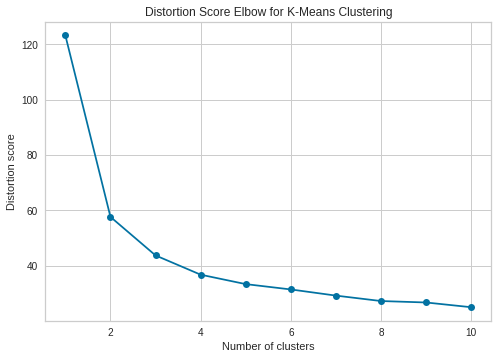

In [141]:
 # Elbow Method
 # Calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, n_init=10, max_iter=700
    )
    km.fit(scaled_clean_df)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion score')
plt.title("Distortion Score Elbow for K-Means Clustering")
plt.show()

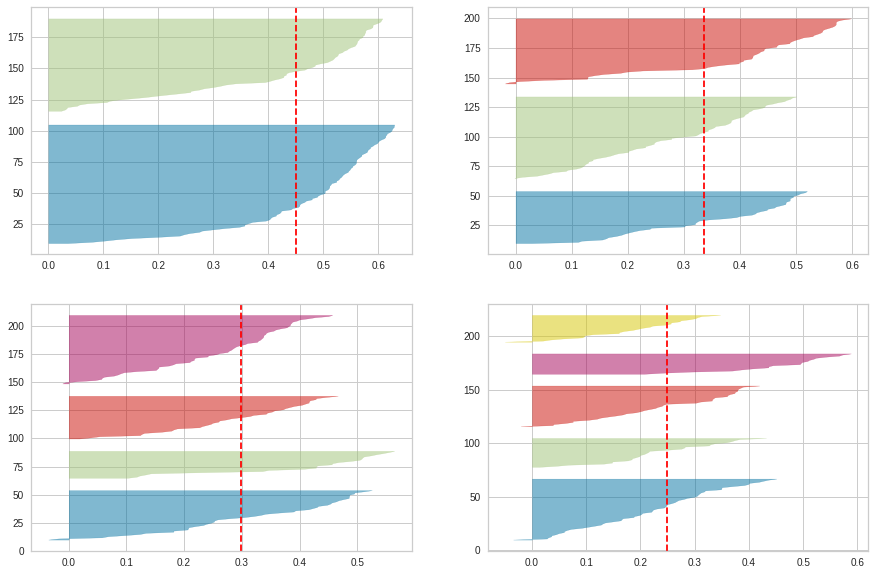

In [142]:
# Silhouette Analysis
# plotting the clusters and checking the distribution
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 2, figsize=(15,10))
for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, n_init = 10, max_iter = 100)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_clean_df.iloc[:,:-2])

Based on the Elbow method the curve was started to change at 2 cluster
and <br>we also observe the consistent cluster sizes in silhouette analysis at 2 clusters

So, the optimal number of clusters to build a model is ***2***<br>


# K-Means Clustering

In [143]:
# Building a K-Means Model with 2 clusters
km = KMeans(
    n_clusters=2, n_init=10, max_iter=300
)
km.fit_predict(scaled_clean_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [144]:
# Adding the Predicted Clusters to the Dataset
scaled_clean_df['KMeans_Prediction'] = km.labels_.tolist()
clean_df['KMeans_Prediction'] = km.labels_.tolist()

In [145]:
scaled_clean_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,KMeans_Prediction
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,1
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,1
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,1
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,1
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,1


# Hierarchical Clustering

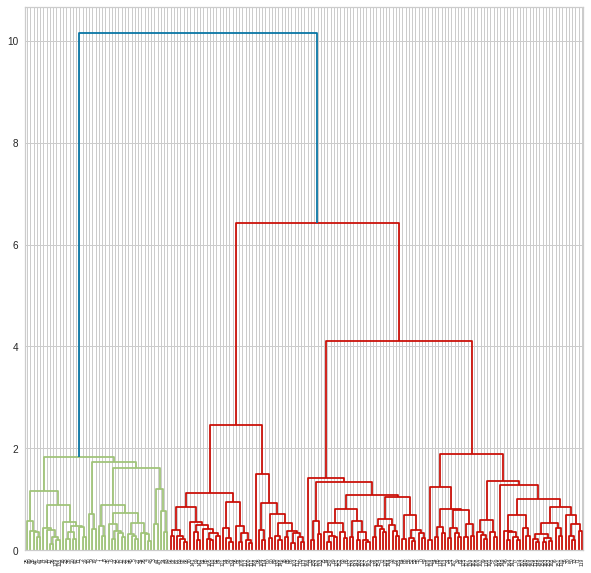

In [146]:
# Plotting the dendrogram
plt.figure(figsize=(10, 10))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(scaled_clean_df.iloc[:,:-2], method='ward'))

In [147]:
# Building a hierarchical clustering Model with 2 clusters
hierarchy_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hierarchy_model.fit(scaled_clean_df.iloc[:,:-2])

AgglomerativeClustering()

In [148]:
# Adding the Predicted Clusters to the Dataset
scaled_clean_df['Hierarchy_Prediction'] = hierarchy_model.labels_.tolist()
clean_df['Hierarchy_Prediction'] = hierarchy_model.labels_.tolist()

In [149]:
scaled_clean_df.head()

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,KMeans_Prediction,Hierarchy_Prediction
0,0.404762,0.192319,0.034632,0.012804,0.158228,0.022332,0.169629,0.190909,0.111111,0.658537,0.666667,0.45,0.381471,0.539267,0.188034,0.650933,1,0
1,0.904762,0.132144,0.093795,0.006692,0.094937,0.016774,0.104328,0.954545,0.111111,0.195122,0.138889,0.25,0.940054,0.062827,0.089744,0.351262,1,1
2,0.690476,0.173874,0.040404,0.000459,0.164557,0.002223,0.099691,0.527273,0.000000,0.365854,0.361111,0.40,0.817439,0.167539,0.111111,0.366630,1,1
3,0.380952,0.033565,0.085137,0.000973,0.208861,0.039612,0.054096,0.336364,0.111111,0.024390,0.055556,0.75,0.566757,0.392670,0.136752,0.522503,1,1
4,0.809524,0.106138,0.017316,0.000658,0.284810,0.002728,0.099691,0.600000,0.000000,0.268293,0.277778,0.25,0.888283,0.109948,0.094017,0.193194,1,1


# Internal Validations to report the cluster Quality and to determine the best clutering method

Using Internal Validations such as <br>
1. CH Score - Calinski harabasz<br>
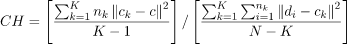
2. DI - Dunn Index <br>
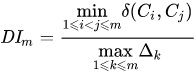
3. Sihouette score: <br>`(b - a) / max(a, b)`
<br>
a= The average distance between each point within a cluster.<br>
b= The average distance between all clusters.

## K-Means Internal Validation

In [150]:
dist_= pairwise_distances(scaled_clean_df.iloc[:,:-2])
dunn_ = dunn(dist_, km.labels_)

print('CH Score for KMeans Clustering: '+ str(metrics.calinski_harabasz_score(scaled_clean_df.iloc[:,:-2], km.labels_)))
print('Dunn Index for KMeans Clustering: '+ str(dunn_))
print('Silhouette score for KMeans Clustering : '+ str(metrics.silhouette_score(scaled_clean_df.iloc[:,:-2], km.labels_)))

CH Score for KMeans Clustering: 192.545250505088
Dunn Index for KMeans Clustering: 0.12192108167876056
Silhouette score for KMeans Clustering : 0.42987453131766545


## Hierarchical Internal Validation

In [151]:
dist_= pairwise_distances(scaled_clean_df.iloc[:,:-2])
dunn_ = dunn(dist_, hierarchy_model.labels_)

print('CH Score for hierarchical Clustering: '+ str(metrics.calinski_harabasz_score(scaled_clean_df.iloc[:,:-2], hierarchy_model.labels_)))
print('Dunn Index for hierarchical Clustering: '+ str(dunn_))
print('Silhouette score for hierarchical Clustering : '+ str(metrics.silhouette_score(scaled_clean_df.iloc[:,:-2], hierarchy_model.labels_)))

CH Score for hierarchical Clustering: 132.8682874980685
Dunn Index for hierarchical Clustering: 0.1586709507086949
Silhouette score for hierarchical Clustering : 0.387360343091392


# Reporting the Best Clustering model and the Countries under each group

Using Dunn Index and silhouette as a metrics to determine the best model, we arrived at a conclusion that **Hierarchical Clustering performs better than KMeans Clustering.**
<br><br>
The Dunn Index is the ratio of the least intra-cluster distance to the distance between observations that are not in the same cluster. So, the higher the value the better is the model performance.
<br><br>
The silhouette value gauges an object's cohesion with its own cluster in comparison to other clusters (separation). A high number on the silhouette implies that the object is well matched to its own cluster and poorly matched to nearby clusters.



In [152]:
# Displaying the countries that are grouped into each category
clean_df.groupby('Hierarchy_Prediction', as_index=True)['Country'].apply(list)

Hierarchy_Prediction
0    [Algeria, Djibouti, Egypt Arab Rep., Mauritius...
1    [Angola, Benin, Botswana, Burkina Faso, Burund...
Name: Country, dtype: object

In [153]:
clean_df[clean_df['Hierarchy_Prediction']==1]['Country'].tolist()

['Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo Dem. Rep.',
 'Congo Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia The',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Swaziland',
 'Tanzania',
 'Togo',
 'Uganda',
 'Zambia',
 'Afghanistan',
 'Timor-Leste',
 'Yemen Rep.',
 'Papua New Guinea']

In [154]:
clean_df[clean_df['Hierarchy_Prediction']==0]['Country'].tolist()

['Algeria',
 'Djibouti',
 'Egypt Arab Rep.',
 'Mauritius',
 'Morocco',
 'Namibia',
 'Sao Tome and Principe',
 'Seychelles',
 'Tunisia',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Bhutan',
 'Brunei Darussalam',
 'Cambodia',
 'China',
 'Georgia',
 'India',
 'Indonesia',
 'Japan',
 'Kazakhstan',
 'Korea Rep.',
 'Kyrgyz Republic',
 'Lao PDR',
 'Malaysia',
 'Mongolia',
 'Nepal',
 'Pakistan',
 'Philippines',
 'Singapore',
 'Sri Lanka',
 'Tajikistan',
 'Thailand',
 'Uzbekistan',
 'Vietnam',
 'Albania',
 'Austria',
 'Belarus',
 'Belgium',
 'Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Macedonia FYR',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Serbia',
 'Slovak Republic',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 '

# Scatter Plots

In [155]:
clean_df

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country,KMeans_Prediction,Hierarchy_Prediction
0,0.025,72.0,25.0,1.990709e+11,0.044,233.0,451.0,0.023,0.1,72.0,69.0,0.9,0.272,0.681,0.047,0.682,Africa,Algeria,1,0
1,0.046,52.1,66.0,1.041159e+11,0.034,178.0,282.0,0.107,0.1,53.0,50.0,0.5,0.477,0.499,0.024,0.409,Africa,Angola,1,1
2,0.037,65.9,29.0,7.294900e+09,0.045,34.0,270.0,0.060,0.0,60.0,58.0,0.8,0.432,0.539,0.029,0.423,Africa,Benin,1,1
3,0.024,19.5,60.0,1.529242e+10,0.052,404.0,152.0,0.039,0.1,46.0,47.0,1.5,0.340,0.625,0.035,0.565,Africa,Botswana,1,1
4,0.042,43.5,13.0,1.039576e+10,0.064,39.0,270.0,0.068,0.0,56.0,55.0,0.5,0.458,0.517,0.025,0.265,Africa,Burkina Faso,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0.018,27.9,694.0,4.363219e+09,0.060,490.0,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,The Americas,Suriname,0,0
202,0.015,29.1,41.0,2.367635e+10,0.053,935.0,210.0,0.020,0.6,73.0,66.0,1.4,0.207,0.708,0.085,0.089,The Americas,Trinidad and Tobago,0,0
204,0.013,46.5,5.0,1.553380e+13,0.177,8467.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States,0,0
205,0.015,41.9,7.0,4.723671e+10,0.088,1213.0,336.0,0.010,0.5,80.0,73.0,1.4,0.223,0.638,0.139,0.946,The Americas,Uruguay,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


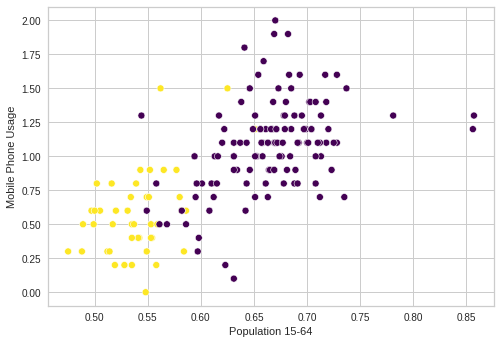

In [156]:
# Population 15-64 Vs Mobile Phone Usage
sns.scatterplot(clean_df['Population 15-64'], clean_df['Mobile Phone Usage'], c=clean_df['Hierarchy_Prediction'],cmap = "viridis")
plt.xlabel("Population 15-64")
plt.ylabel("Mobile Phone Usage")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


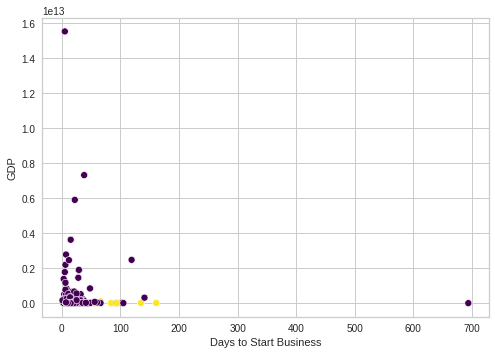

In [157]:
# Days to Start Business Vs GDP
sns.scatterplot(clean_df['Days to Start Business'], clean_df['GDP'], c=clean_df['Hierarchy_Prediction'],cmap = "viridis")
plt.xlabel("Days to Start Business")
plt.ylabel("GDP")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


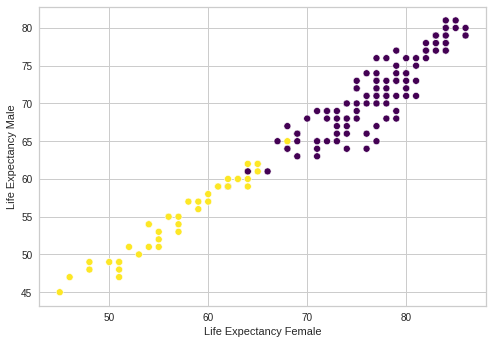

In [158]:
# Life Expectancy Female Vs Life Expectancy Male
sns.scatterplot(clean_df['Life Expectancy Female'], clean_df['Life Expectancy Male'], c=clean_df['Hierarchy_Prediction'],cmap = "viridis")
plt.xlabel("Life Expectancy Female")
plt.ylabel("Life Expectancy Male")
plt.show()